In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '189.4 thousand',
 5: '371.1 thousand',
 10: '531.4 thousand',
 20: '829.4 thousand',
 30: '1.2 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.5 million',
 70: '3.3 million',
 80: '4.6 million',
 90: '7.3 million',
 95: '10.4 million',
 99: '20.5 million'}
-
## Actual GPT-3 estimated to be ##
{1: '181.2 thousand',
 5: '323.5 thousand',
 10: '440.7 thousand',
 20: '638.6 thousand',
 30: '835.8 thousand',
 40: '1.1 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.6 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.2 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.3th percentile of the model
-


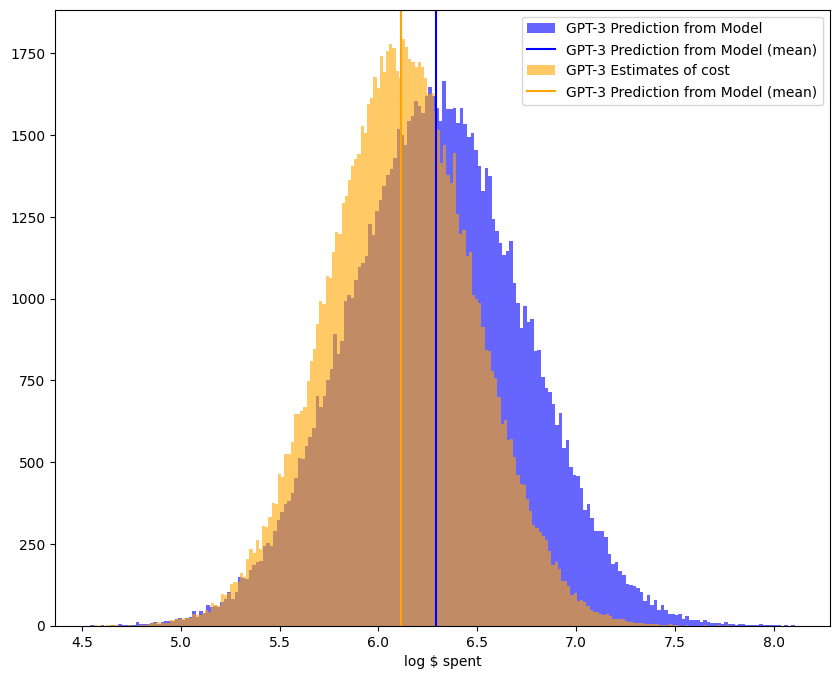

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.7 million',
 5: '5.6 million',
 10: '7.1 million',
 20: '9.3 million',
 30: '11.4 million',
 40: '13.4 million',
 50: '15.8 million',
 60: '18.5 million',
 70: '22.0 million',
 80: '26.8 million',
 90: '35.3 million',
 95: '44.3 million',
 99: '68.0 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.3 million',
 5: '5.8 million',
 10: '7.9 million',
 20: '11.5 million',
 30: '15.0 million',
 40: '18.8 million',
 50: '23.3 million',
 60: '28.8 million',
 70: '36.1 million',
 80: '47.3 million',
 90: '69.0 million',
 95: '93.6 million',
 99: '166.0 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.2th percentile of the model
-


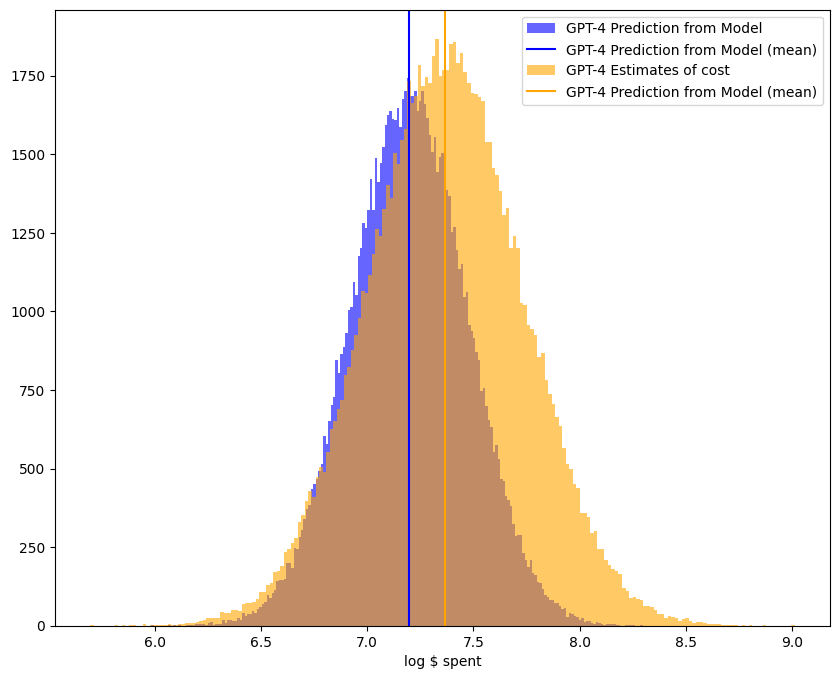

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.4 million',
 5: '7.2 million',
 10: '13.1 million',
 20: '27.1 million',
 30: '45.7 million',
 40: '71.8 million',
 50: '109.4 million',
 60: '166.6 million',
 70: '260.1 million',
 80: '439.8 million',
 90: '899.9 million',
 95: '1.6 billion',
 99: '4.7 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.4 million',
 5: '8.0 million',
 10: '10.8 million',
 20: '15.7 million',
 30: '20.6 million',
 40: '25.8 million',
 50: '32.1 million',
 60: '39.9 million',
 70: '50.3 million',
 80: '65.4 million',
 90: '94.3 million',
 95: '127.4 million',
 99: '230.4 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 23.1th percentile of the model
-


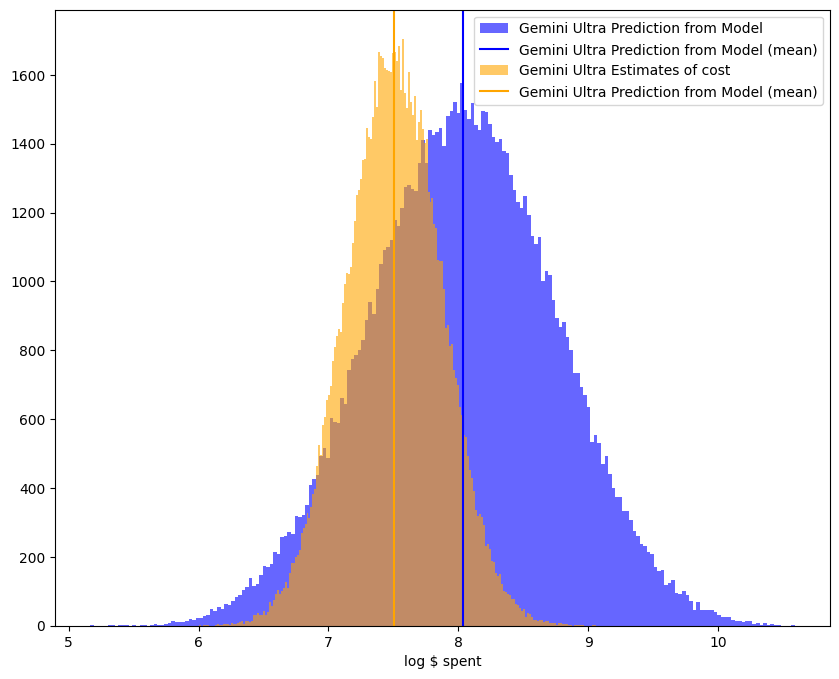

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Model for Largest Training Run in 2024

$85.2 million (80%CI: $26.4 million to $277.8 million)
-
{1: '10.3 million',
 5: '19.1 million',
 10: '26.4 million',
 20: '39.3 million',
 30: '52.6 million',
 40: '67.3 million',
 50: '85.1 million',
 60: '107.3 million',
 70: '137.5 million',
 80: '184.0 million',
 90: '277.8 million',
 95: '389.3 million',
 99: '701.7 million'}
-


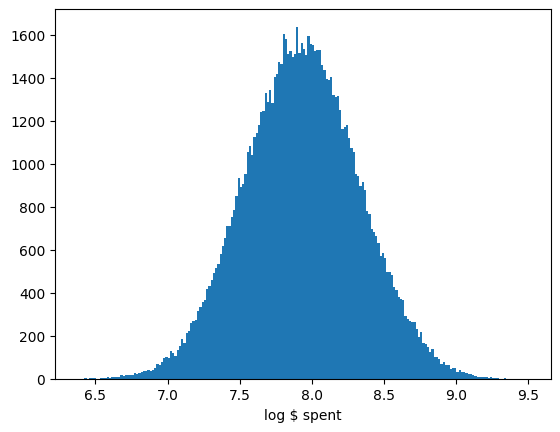

In [5]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 12*B),
                                                                       total_revenue=sq.lognorm(1.3*B, 2.5*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

$16.7 million (80%CI: $4.7 million to $59.2 million)
-
{1: '1.7 million',
 5: '3.3 million',
 10: '4.7 million',
 20: '7.3 million',
 30: '10.0 million',
 40: '13.0 million',
 50: '16.7 million',
 60: '21.4 million',
 70: '27.9 million',
 80: '38.2 million',
 90: '59.2 million',
 95: '84.8 million',
 99: '167.1 million'}
-


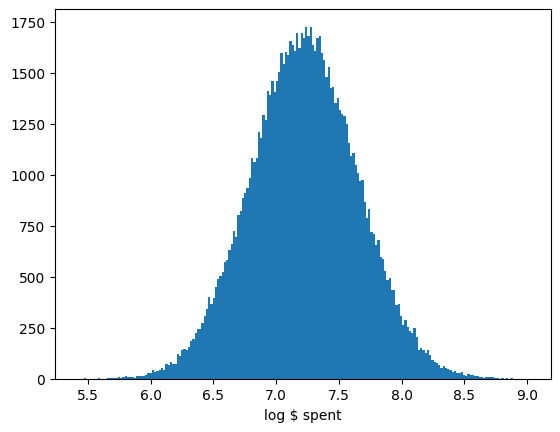

In [6]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 5*B, credibility=80),
                                                                          total_revenue=sq.lognorm(0.5*B, 1*B, credibility=80),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

In [7]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 60*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = largest_google_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '2.7 million',
 5: '7.9 million',
 10: '14.3 million',
 20: '29.9 million',
 30: '50.6 million',
 40: '79.6 million',
 50: '121.3 million',
 60: '184.7 million',
 70: '287.4 million',
 80: '484.5 million',
 90: '992.5 million',
 95: '1.8 billion',
 99: '5.1 billion'}


In [8]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = largest_microsoft_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1.6 million',
 5: '4.1 million',
 10: '6.9 million',
 20: '13.1 million',
 30: '20.8 million',
 40: '31.1 million',
 50: '45.4 million',
 60: '65.6 million',
 70: '98.2 million',
 80: '155.9 million',
 90: '296.1 million',
 95: '507.5 million',
 99: '1.4 billion'}


In [9]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 30*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.1),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.1))
samples = largest_fb_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '301.9 thousand',
 5: '818.8 thousand',
 10: '1.4 million',
 20: '2.8 million',
 30: '4.4 million',
 40: '6.6 million',
 50: '9.7 million',
 60: '14.1 million',
 70: '21.1 million',
 80: '33.9 million',
 90: '65.5 million',
 95: '112.6 million',
 99: '313.6 million'}


In [10]:
largest_inflection_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 2*B, credibility=80),
                                                                           total_revenue=sq.lognorm(10*M, 200*M, credibility=80),
                                                                           percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                           percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                           percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                           percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = largest_inflection_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1.1 million',
 5: '2.1 million',
 10: '2.9 million',
 20: '4.3 million',
 30: '5.6 million',
 40: '7.2 million',
 50: '9.0 million',
 60: '11.3 million',
 70: '14.4 million',
 80: '19.2 million',
 90: '28.4 million',
 95: '39.3 million',
 99: '73.2 million'}


In [11]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(500*M, 1*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.2, sd=0.05))
samples = largest_mistral_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1.5 million',
 5: '2.6 million',
 10: '3.5 million',
 20: '5.0 million',
 30: '6.4 million',
 40: '8.0 million',
 50: '9.8 million',
 60: '12.1 million',
 70: '15.1 million',
 80: '19.5 million',
 90: '27.9 million',
 95: '37.5 million',
 99: '64.6 million'}


In [12]:
us_gov_prediction = sq.mixture([[0.6, sq.norm(4, 6, credibility=80)],
                                [0.3, sq.norm(6, 8, credibility=80)],
                                [0.1, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(1*B, 10*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                               percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))]])
samples = us_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: '2.2 thousand',
 5: '8.3 thousand',
 10: '17.6 thousand',
 20: '45.9 thousand',
 30: '100.2 thousand',
 40: '208.9 thousand',
 50: '494.8 thousand',
 60: '1.5 million',
 70: '5.3 million',
 80: '21.1 million',
 90: '93.7 million',
 95: '221.5 million',
 99: '705.2 million'}


In [13]:
uk_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '32.8 million',
 5: '100.0 million',
 10: '100.0 million',
 20: '100.0 million',
 30: '100.0 million',
 40: '131.2 million',
 50: '205.4 million',
 60: '330.4 million',
 70: '557.6 million',
 80: '1.1 billion',
 90: '2.6 billion',
 95: '5.3 billion',
 99: '18.2 billion'}


In [14]:
china_gov_prediction = sq.mixture([[0.05, 0],
                                   [0.55, sq.norm(6, 8, lclip=6)],
                                   [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                  percent_r_and_d_on_ai=1,
                                                                                  percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])

# Adjust China's "effective US-equivalent" spend by export controls and other things
# china_gov_prediction = sq.dist_max(0, china_gov_prediction - sq.norm(0.1, 0.5, lclip=0.05, rclip=1))

samples = china_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: 1.0,
 5: '1.0 million',
 10: '1.6 million',
 20: '4.3 million',
 30: '8.5 million',
 40: '15.9 million',
 50: '32.3 million',
 60: '84.1 million',
 70: '283.2 million',
 80: '796.5 million',
 90: '2.4 billion',
 95: '5.1 billion',
 99: '18.6 billion'}


In [15]:
uae_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                 [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                percent_r_and_d_on_ai=1,
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '32.4 million',
 5: '100.0 million',
 10: '100.0 million',
 20: '100.0 million',
 30: '100.0 million',
 40: '130.2 million',
 50: '205.0 million',
 60: '329.3 million',
 70: '552.9 million',
 80: '1.0 billion',
 90: '2.6 billion',
 95: '5.2 billion',
 99: '18.2 billion'}


In [16]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_inflection_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(us_gov_prediction) >>
               sq.dist_max(uk_gov_prediction) >>
               sq.dist_max(uae_gov_prediction) >>
               sq.dist_max(china_gov_prediction))
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '100.0 million',
 5: '176.6 million',
 10: '251.4 million',
 20: '402.7 million',
 30: '586.5 million',
 40: '825.4 million',
 50: '1.2 billion',
 60: '1.7 billion',
 70: '2.5 billion',
 80: '4.0 billion',
 90: '7.7 billion',
 95: '13.2 billion',
 99: '34.7 billion'}


In [17]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Inflection', largest_inflection_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['USGov', us_gov_prediction],
          ['UKGov', uk_gov_prediction],
          ['UAEGov', uae_gov_prediction],
          ['ChinaGov', china_gov_prediction]]

labels = [m[0] for m in models]
max_indices = np.argmax([m[1] @ 100_000 for m in models], axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
label_percentages

{'UAEGov': '27.2%',
 'UKGov': '27.9%',
 'Google': '15.3%',
 'ChinaGov': '19.2%',
 'OpenAI': '4.0%',
 'Microsoft': '4.3%',
 'Meta': '0.5%',
 'USGov': '1.4%',
 'Anthropic': '0.2%',
 'Mistral': '0.0%',
 'Inflection': '0.0%'}

## Cache spend model

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 2621726.75it/s]


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.0,
 5: 8.2,
 10: 8.4,
 20: 8.6,
 30: 8.8,
 40: 8.9,
 50: 9.1,
 60: 9.2,
 70: 9.4,
 80: 9.6,
 90: 9.9,
 95: 10.1,
 99: 10.5}


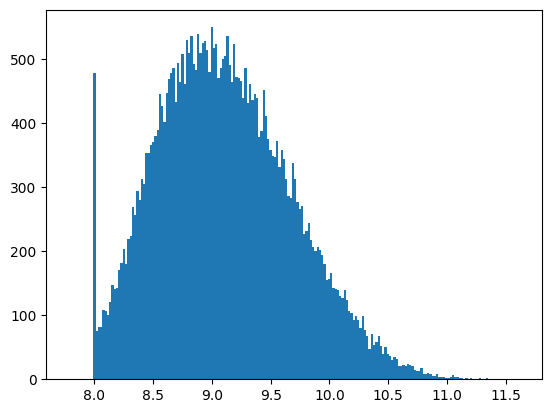

In [18]:
# Output expected willingness to pay for a model in 2024, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## 2025

$114.4 million (80%CI: $43.6 million to $301.0 million)
-
{1: '19.4 million',
 5: '32.9 million',
 10: '43.6 million',
 20: '60.6 million',
 30: '77.0 million',
 40: '94.5 million',
 50: '114.5 million',
 60: '138.5 million',
 70: '170.5 million',
 80: '215.9 million',
 90: '301.0 million',
 95: '395.7 million',
 99: '670.7 million'}
-


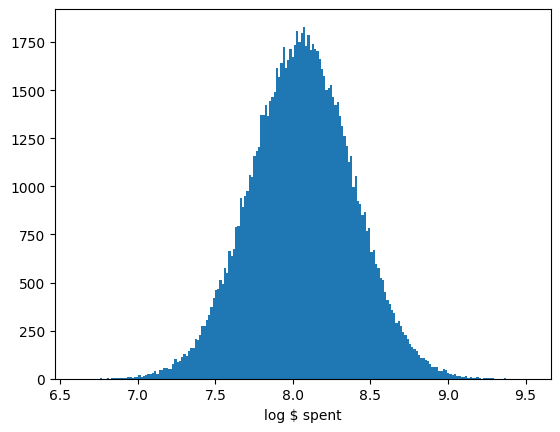

In [19]:
largest_openai_model_prediction_2025 = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(15*B, 30*B),
                                                                            total_revenue=sq.lognorm(1*B, 4*B),
                                                                            percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                                            percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                            percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                            percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                            percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction_2025 @ (100*K))

In [20]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-15 12:27:42.256869
